# Regresión Lineal Incremental Regularizada

Danae Sánchez Villegas 136040


# Descripción

Implementación del algoritmo de regresión lineal incremental regularizada

Pasos:

Bajar el archivo regLinPoli.xls 

Escalar los datos usando el StandardScaler 

Programar la regresión lineal incremental regularizada 

Graficar el error para distintos valores de lambda 

In [2]:
import pandas as pd
import numpy as np
import csv
import random
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

# Funciones

In [3]:
def salida(x,w0,W):
    sum=0
    for i in range(len(x)):
        sum=sum+x[i]*W[i]
    sum=sum+w0
    return sum
 
def entrenaSinReg(X,w0,W,y,n):
    
    nu=0.01
    
    for i in range(n):
        error=y[i]-salida(X[i],w0,W)
        w0=w0+nu*error
            
        for j in range(len(X[i])):
            W[j]=W[j]+nu*(error*X[i][j])
    
    return w0,W

def entrena(X,w0,W,y,n,lbd):
    
    nu=0.01
    
    for i in range(n):
        error=y[i]-salida(X[i],w0,W)
        w0=w0+nu*error
            
        for j in range(len(X[i])):
            W[j]=W[j]+nu*(error*X[i][j]-lbd*W[j])
    
    return w0,W

def errorPorTupla(X,y,w0,W):
    i=0
    suma=0.0
    for x in X:
        suma= suma + ((x.dot(W) +w0) -y[i])**2
        i=i+1
    return suma/i



# Regresión Lineal Iterativa Regularizada

# Importar Datos

In [4]:
dia = csv.excel()
df = pd.read_csv("regLin.csv")

In [5]:
# X_train, X_test, Y_train, Y_test = train_test_split(df[['X','X2','X3','X4']],df[['y']], train_size=0.75)
X_train, X_test, Y_train, Y_test = train_test_split(df[['X']],df[['y']], train_size=0.75)

#Normalizar 

In [6]:
from sklearn import preprocessing
scaleX=preprocessing.StandardScaler()
scaleY=preprocessing.StandardScaler()

#normalizar datos de entrenamiento 
scaleX.fit(X_train)
X_train=scaleX.transform(X_train)
scaleY.fit(Y_train)
Y_train=scaleY.transform(Y_train)

#normalizar datos de prueba
scaleX.fit(X_test)
X_test=scaleX.transform(X_test)
scaleY.fit(Y_test)
Y_test=scaleY.transform(Y_test)


# Probar

In [25]:
lamba=[random.uniform(0.0001,0.001) for i in range(15)]
W=[random.random() for i in range(len(X_test[0]))]
w0=random.random()
errorPorLambda=[0 for x in range(len(lamba))]

In [26]:
for j in range(len(lamba)):
    for i in range(100):
        w0,W=entrena(np.asarray(X_test),w0,W,np.asarray(Y_test),len(X_test),lamba[j])

    errorPorLambda[j]=errorPorTupla(np.asarray(X_test),np.asarray(Y_test),w0[0],W)


In [27]:
w0


array([ 0.01061324])

In [28]:
W

[array([ 0.98192678])]

# Graficar error conjunto de prueba

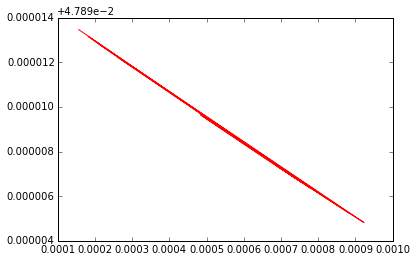

In [31]:
plt.plot(lamba,(errorPorLambda),color='red')

# Conclusiones

La regresión Lineal Incremental es buena cuando se necesitan agregar constantemente

nuevos valores, ya que puede resultar muy cotoso reentrenar a todo el conjunto de 

datos.

Al agregar la regularización se da mayor peso a los valores que producen un mejor

resultado. En este caso lo que se busca es mantener a las w's bajas. 